In [2]:
import pandas as pd
import numpy as np
import torch
import json
import os
from PIL import Image

In [9]:
class HatefulMemesDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, img_only=True, limit_to_examples=None):
        self.data = [json.loads(l) for l in open(data_path)]
        if limit_to_examples & limit_to_examples > 0:
            self.data = self.data[:limit_to_examples]
        self.data_dir = os.path.dirname(data_path)
        self.img_only = img_only
            
    def __getitem__(self, index: int):
        # Load images on the fly.
        image = Image.open(os.path.join(self.data_dir, self.data[index]["img"])).convert("RGB")
        text = self.data[index]["text"]
        label = self.data[index]["label"]
        if self.img_only:
            return image, label
        else:
            return image, text, label

    def load_image_only(self, index: int):
        image = Image.open(os.path.join(self.data_dir, self.data[index]["img"])).convert("RGB")
        return image
    
    def get_label(self, index: int):
        label = self.data[index]["label"]
        return label
    
    def __len__(self):
        return len(self.data)

In [10]:
train_data = HatefulMemesDataset('../../data/train.jsonl', limit_to_examples=20)

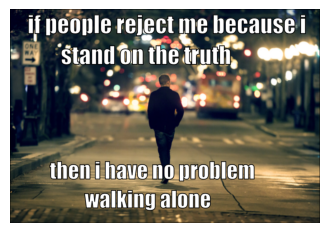

0


In [13]:
import matplotlib.pyplot as plt
sample_memeID = 19
img, label = train_data[sample_memeID]

# Show input image.
plt.figure(figsize=(4,5));plt.imshow(img); plt.axis(False);plt.show()

# Show input plot (untokenized).
# print(text)
print(label)

In [17]:
from transformers import BertModel, BertTokenizer
from transformers import CLIPProcessor, CLIPModel

In [18]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

c:\Users\shrij\miniconda3\envs\hmc\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrij\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [19]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

c:\Users\shrij\miniconda3\envs\hmc\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrij\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_

In [20]:
clip_model

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e